In [21]:
import pandas as pd

cm_features_version = '1.0'
prediction_year = 2022
cm_features = pd.read_csv(f'../data/cm_features_v{cm_features_version}_Y{prediction_year}.csv')
cm_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62870 entries, 0 to 62869
Columns: 160 entries, month_id to ged_sb_14
dtypes: float64(154), int64(2), object(4)
memory usage: 76.7+ MB


In [22]:
cm_features

,month_id,country_id,gleditsch_ward,ged_sb,ged_ns,ged_os,acled_sb,acled_sb_count,acled_os,ged_sb_tsum_24,...,region23_Northern Europe,region23_South America,region23_South-Eastern Asia,region23_Southern Africa,region23_Southern Asia,region23_Southern Europe,region23_Western Africa,region23_Western Asia,region23_Western Europe,ged_sb_14
0,121,1,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,121,2,115.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,121,3,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,121,4,101.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,121,7,160.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62865,502,242,510.0,0.0,0.0,1.0,0.0,0.0,2.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62866,502,243,600.0,0.0,0.0,0.0,2.0,2.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62867,502,244,435.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
62868,502,245,625.0,3.0,3.0,9.0,2.0,1.0,42.0,82.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
columns_to_drop = ['month_id',
                   'gw_statename',
                   'country_id',
                   'date',
                   'year',
                   'gleditsch_ward',
                   'ccode',
                   'region',
                   'region23'
                   ]

columns_to_drop.extend(cm_features.filter(regex='^region_|^region23').columns.tolist())
columns_to_drop.extend(cm_features.filter(regex='decay|splag|vdem').columns.tolist())

numeric_columns = cm_features.drop(columns=columns_to_drop).columns.tolist()

In [24]:
import numpy as np
from sklearn.preprocessing import RobustScaler, PowerTransformer, QuantileTransformer, MinMaxScaler
from sklearn.compose import ColumnTransformer

skew_threshold = 2  # This is somewhat arbitrary; common thresholds are in the range of 1 to 2
high_skew = cm_features[numeric_columns].apply(lambda x: x.skew()).abs() > skew_threshold
high_skew_cols = high_skew[high_skew].index.tolist()
print(high_skew_cols)

# Print min and max of values present in each of the high skew columns
for column in high_skew_cols:
    print(f"Min and Max of {column}: {cm_features[column].min()}, {cm_features[column].max()}")

    # TODO: apply log transformation to every column. Add min + 1 to the column to ensure the suitable transformation
    if cm_features[column].max() > 100:
        transformed_column = np.log(cm_features[column] + cm_features[column].min() + 1)
        cm_features[column] = transformed_column

    print(f"Transformed Min and Max of {column}: {cm_features[column].min()}, {cm_features[column].max()}")
normal_numeric = [col for col in numeric_columns if col not in high_skew_cols]
# normal_numeric

['ged_sb', 'ged_ns', 'ged_os', 'acled_sb', 'acled_sb_count', 'acled_os', 'ged_sb_tsum_24', 'wdi_sp_pop_totl', 'ged_sb_tlag_1', 'ged_sb_tlag_2', 'ged_sb_tlag_3', 'ged_sb_tlag_4', 'ged_sb_tlag_5', 'ged_sb_tlag_6', 'ged_os_tlag_1', 'wdi_ag_lnd_frst_k2', 'wdi_dt_oda_odat_pc_zs', 'wdi_ms_mil_xpnd_gd_zs', 'wdi_ms_mil_xpnd_zs', 'wdi_nv_agr_totl_kd', 'wdi_nv_agr_totl_kn', 'wdi_ny_gdp_pcap_kd', 'wdi_se_enr_prim_fm_zs', 'wdi_se_enr_prsc_fm_zs', 'wdi_sm_pop_refg_or', 'wdi_sm_pop_totl_zs', 'agr_withdrawal_pct_t48', 'dam_cap_pcap_t48', 'groundwater_export_t48', 'fresh_withdrawal_pct_t48', 'ind_efficiency_t48', 'irr_agr_efficiency_t48', 'services_efficiency_t48', 'general_efficiency_t48', 'water_stress_t48', 'renewable_internal_pcap_t48', 'renewable_pcap_t48', 'ged_sb_14']
Min and Max of ged_sb: 0.0, 48183.0
Transformed Min and Max of ged_sb: 0.0, 10.782782294723557
Min and Max of ged_ns: 0.0, 5664.0
Transformed Min and Max of ged_ns: 0.0, 8.642062173462106
Min and Max of ged_os: 0.0, 443929.0
Trans

/Users/zakotianskyi/Library/Caches/pypoetry/virtualenvs/my_project-FBv7emLR-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [25]:


preprocessor = ColumnTransformer(
    transformers=[
        ('power', QuantileTransformer(), high_skew_cols),  # Apply RobustScaler to highly skewed columns
        ('minmax', MinMaxScaler(), normal_numeric)  # Apply MinMaxScaler to the rest
    ],
    remainder='passthrough'  # Include columns not explicitly transformed
)

# Fit and transform the data
cm_features_scaled = preprocessor.fit_transform(cm_features)

# Get the correct column order after transformation
# This combines the transformed column names with the remainder (passed-through) columns
transformed_cols = [col for name, _, cols in preprocessor.transformers_[:-1] for col in cols] + \
                   list(preprocessor.named_transformers_['remainder'].get_feature_names_out())

# Create DataFrame from scaled data with correct column names
cm_features_scaled_df = pd.DataFrame(cm_features_scaled, columns=transformed_cols)

cm_features_scaled_df

,ged_sb,ged_ns,ged_os,acled_sb,acled_sb_count,acled_os,ged_sb_tsum_24,wdi_sp_pop_totl,ged_sb_tlag_1,ged_sb_tlag_2,...,region23_Northern America,region23_Northern Europe,region23_South America,region23_South-Eastern Asia,region23_Southern Africa,region23_Southern Asia,region23_Southern Europe,region23_Western Africa,region23_Western Asia,region23_Western Europe
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.077077,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023965,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.121051,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.954955,0.0,0.0,0.0,0.0,0.673674,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.781142,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62865,0.0,0.0,0.904905,0.0,0.0,0.904905,0.787788,0.886482,0.0,0.89039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62866,0.0,0.0,0.0,0.923924,0.921922,0.0,0.753754,0.800805,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.317255,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
62868,0.874875,0.953453,0.947948,0.923924,0.907407,0.968474,0.828829,0.83261,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
cm_features_scaled_df[['month_id', 'gw_statename', 'ged_sb', 'water_stress_t48']]

,month_id,gw_statename,ged_sb,water_stress_t48
0,121,Guyana,0.0,0.255756
1,121,Surinam,0.0,0.240277
2,121,Trinidad and Tobago,0.0,0.597097
3,121,Venezuela,0.0,0.192857
4,121,Argentina,0.0,0.437437
...,...,...,...,...
62865,502,Tanzania/Tanganyika,0.0,0.536537
62866,502,Morocco,0.0,0.796797
62867,502,Mauritania,0.0,0.545546
62868,502,Sudan,0.874875,0.927731


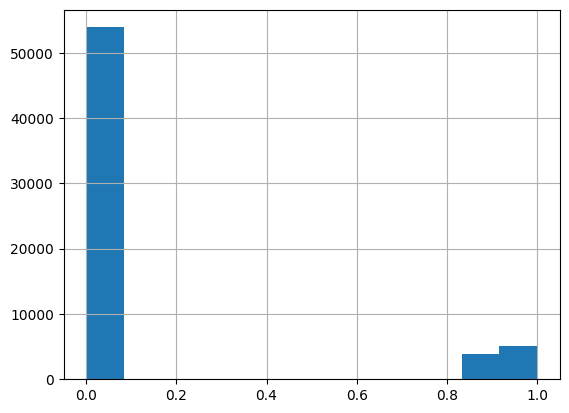

In [27]:
# plot hist of ged_sb scaled
import matplotlib.pyplot as plt

cm_features_scaled_df['ged_sb'].hist(bins=12)
plt.show()

In [28]:
high_skew_cols

['ged_sb',
 'ged_ns',
 'ged_os',
 'acled_sb',
 'acled_sb_count',
 'acled_os',
 'ged_sb_tsum_24',
 'wdi_sp_pop_totl',
 'ged_sb_tlag_1',
 'ged_sb_tlag_2',
 'ged_sb_tlag_3',
 'ged_sb_tlag_4',
 'ged_sb_tlag_5',
 'ged_sb_tlag_6',
 'ged_os_tlag_1',
 'wdi_ag_lnd_frst_k2',
 'wdi_dt_oda_odat_pc_zs',
 'wdi_ms_mil_xpnd_gd_zs',
 'wdi_ms_mil_xpnd_zs',
 'wdi_nv_agr_totl_kd',
 'wdi_nv_agr_totl_kn',
 'wdi_ny_gdp_pcap_kd',
 'wdi_se_enr_prim_fm_zs',
 'wdi_se_enr_prsc_fm_zs',
 'wdi_sm_pop_refg_or',
 'wdi_sm_pop_totl_zs',
 'agr_withdrawal_pct_t48',
 'dam_cap_pcap_t48',
 'groundwater_export_t48',
 'fresh_withdrawal_pct_t48',
 'ind_efficiency_t48',
 'irr_agr_efficiency_t48',
 'services_efficiency_t48',
 'general_efficiency_t48',
 'water_stress_t48',
 'renewable_internal_pcap_t48',
 'renewable_pcap_t48',
 'ged_sb_14']

In [29]:
def inverse_transform_column(transformer, column_name, scaled_df):
    """
    Inverse transforms a specific column using the given transformer.

    Args:
    transformer (ColumnTransformer): The fitted ColumnTransformer.
    column_name (str): Name of the column to inverse transform.
    scaled_df (DataFrame): The DataFrame containing the scaled data.

    Returns:
    DataFrame: The column data inverse transformed as a DataFrame.
    """
    # Extract the transformer for the specified column
    for name, trans, cols in transformer.transformers_:
        if column_name in cols:
            # Ensure we use a DataFrame to preserve column names
            column_data = scaled_df[[column_name]]
            return pd.DataFrame(trans.inverse_transform(column_data), columns=[column_name])

    raise ValueError(f"Column {column_name} not found in any transformer.")


# Example usage: Assuming 'ged_sb' is the column transformed with QuantileTransformer

ged_sb_original_df = inverse_transform_column(preprocessor, 'ged_sb', cm_features_scaled_df)
print(ged_sb_original_df.head())

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- acled_os
- acled_sb
- acled_sb_count
- agr_withdrawal_pct_t48
- dam_cap_pcap_t48
- ...


In [ ]:
# import matplotlib.pyplot as plt
# import shutil
# 
# PLOT_FIGURES = False
# 
# 
# def plot_column_distributions(dataframe, columns, folder='plots', img_size=(4, 3)):
#     """
#     Plot and save histograms for specified columns in a dataframe.
# 
#     Parameters:
#     - dataframe: pandas DataFrame containing the data.
#     - columns: List of column names to plot.
#     - folder: String specifying the directory to save the plots.
#     - img_size: Tuple specifying the size of the images.
#     """
#     import os
#     # remove dir if exists
#     if os.path.exists(folder):
#         shutil.rmtree(folder)
#     os.makedirs(folder, exist_ok=True)
# 
#     skewed_columns = []
#     other_columns = []
# 
#     for col in columns:
#         if col.startswith('b_'):  # skip b_ columns
#             continue
# 
#         # Check if the column exists in the dataframe to avoid KeyError
#         if col in dataframe.columns:
#             col_data = dataframe[col].dropna()
# 
#             # Log the minimum and maximum values of the column. Round to 2 decimal places.
#             min_val = round(col_data.min(), 2)
#             max_val = round(col_data.max(), 2)
#             skewness = round(col_data.skew(), 2)
# 
#             cols = [col]
#             if col.startswith('a_'):
#                 cols = [col, 'b_' + col[2:]]
# 
#             if skewness > 1:
#                 skewed_columns.extend(cols)
#             else:
#                 other_columns.extend(cols)
# 
#             print(f"Column: {col} - Min: {min_val}, Max: {max_val} - Skew: {skewness}")
#             if PLOT_FIGURES:
#                 plt.figure(figsize=img_size)
#                 col_data.hist(bins=12, alpha=0.75)
#                 plt.title(f"{col} - Min: {min_val}, Max: {max_val} - Skew: {skewness}")
#                 plt.xlabel('Value')
#                 plt.ylabel('Frequency')
# 
#                 # Save the plot
#                 plt.savefig(f"{folder}/{col}.png", format='png', dpi=100)
#                 plt.close()  # Close the figure to free memory
#         else:
#             print(f"Column {col} not found in dataframe.")
# 
#     return skewed_columns, other_columns
# 
# 
# # Usage:
# skewed_cols, other_columns = plot_column_distributions(cm_features, numeric_columns)

In [ ]:
# import pandas as pd
# from sklearn.preprocessing import QuantileTransformer, StandardScaler
# from sklearn.compose import ColumnTransformer
# import joblib  # For saving scikit-learn models
# 
# 
# def fit_and_transform_data(train_df, test_df, skewed_cols, other_cols):
#     """
#     Fits scalers to the train_df and transforms both train_df and test_df.
#     Saves the scalers for later use.
#     
#     Parameters:
#     - train_df: pandas DataFrame, training data.
#     - test_df: pandas DataFrame, testing data.
#     - skewed_cols: List of column names that are heavily right-skewed.
#     - other_cols: List of column names that are not heavily right-skewed.
#     
#     Returns:
#     - train_df_scaled: Scaled training data.
#     - test_df_scaled: Scaled testing data.
#     """
#     # Define the transformations for each group of features
#     transformers = [
#         ('quantile', QuantileTransformer(output_distribution='normal'), skewed_cols),
#         ('standard', StandardScaler(), other_cols)
#     ]
# 
#     # Create a ColumnTransformer to apply the scaling
#     preprocessor = ColumnTransformer(transformers, remainder='passthrough')
# 
#     # Fit and transform the training data
#     train_df_scaled = preprocessor.fit_transform(train_df)
#     train_df_scaled = pd.DataFrame(train_df_scaled, columns=train_df.columns, index=train_df.index)
# 
#     # Transform the testing data using the fitted scalers from the training data
#     test_df_scaled = preprocessor.transform(test_df)
#     test_df_scaled = pd.DataFrame(test_df_scaled, columns=test_df.columns, index=test_df.index)
# 
#     # Save the preprocessor model for inverse transform or further transformations
#     joblib.dump(preprocessor, 'data_scaler.joblib')
# 
#     return train_df_scaled, test_df_scaled
# 
# 
# # Assuming you have the 'train_df' and 'test_df' DataFrames already loaded
# train_df_scaled, test_df_scaled = fit_and_transform_data(train_df, test_df, skewed_cols, other_columns)
# 
# print(train_df_scaled.head())
# print(test_df_scaled.head())